In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import skimage.measure
import skimage.morphology

In [2]:
from google.colab import files
uploaded = files.upload()

img1 = cv2.imread('2.png')
img = cv2.imread('2.png', 0)

Saving 2.png to 2 (3).png


In [3]:
image_equalized = cv2.equalizeHist(img)

In [4]:
image_equalized

array([[129, 129, 129, ..., 213, 213, 213],
       [129, 129, 129, ..., 213, 213, 213],
       [129, 129, 129, ..., 213, 213, 213],
       ...,
       [ 13,  13,  18, ..., 147, 147, 147],
       [ 10,  10,  13, ..., 138, 129, 129],
       [ 10,  10,  13, ..., 138, 129, 129]], dtype=uint8)

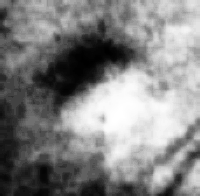

In [5]:
from PIL import Image
cm = Image.fromarray(image_equalized)
cm = cm.convert('RGB')
cm

In [6]:
blur = cv2.GaussianBlur(image_equalized,(5,5),0)

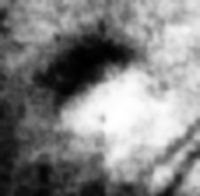

In [7]:
from PIL import Image
cm = Image.fromarray(blur)
cm = cm.convert('RGB')
cm

In [8]:
ret3,th3 = cv2.threshold(blur,150,230,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [9]:
ret3

130.0

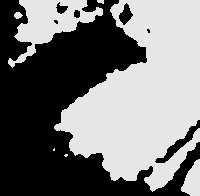

In [10]:
from PIL import Image
cm = Image.fromarray(th3)
cm = cm.convert('RGB')
cm

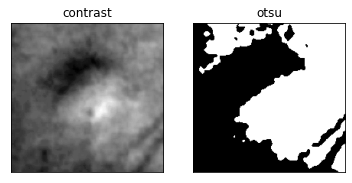

In [11]:
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('contrast'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(th3, cmap = 'gray')
plt.title('otsu'), plt.xticks([]), plt.yticks([])

plt.show()

In [12]:
def vdk_perimeter(th3):
    (w, h) = th3.shape
    data = np.zeros((w + 2, h + 2), dtype=th3.dtype)
    data[1:-1, 1:-1] = th3
    data = skimage.morphology.binary_dilation(data)
    newdata = np.copy(data)
    for i in range(1, w + 1):
        for j in range(1, h + 1):
            cond = data[i, j] == data[i, j + 1] and \
                   data[i, j] == data[i, j - 1] and \
                   data[i, j] == data[i + 1, j] and \
                   data[i, j] == data[i - 1, j]
            if cond:
                newdata[i, j] = 0

    return np.count_nonzero(newdata)

In [13]:
label_img = skimage.measure.label(th3)
regions = skimage.measure.regionprops(label_img)

for props in regions:
    print (props.area, vdk_perimeter(props.convex_image))

2538 249
22 20
16755 515
44 22
5 9
9 11
462 91
